# Number Recognition with Artificial Neural Networks using Tensorflow

## Import Libraries


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
from tensorflow.keras.datasets import mnist

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

We are using the famous dataset MNIST. This dataset contains images of digits, 0-9, what wa want to do is to build a model that can recognize digits correctly.



In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Data Exploration

* see first item of X_train and y_train *

In [4]:
X_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

#### shape of our X_train, X_test, y_train, y_test

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### our labels are from 0 to 9

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### show first image

Text(0.5, 1.0, 'first picture')

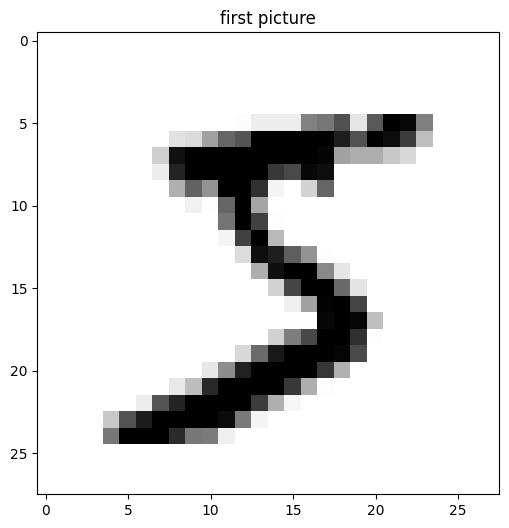

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.title('first picture')

### randomly show 4 images with labels

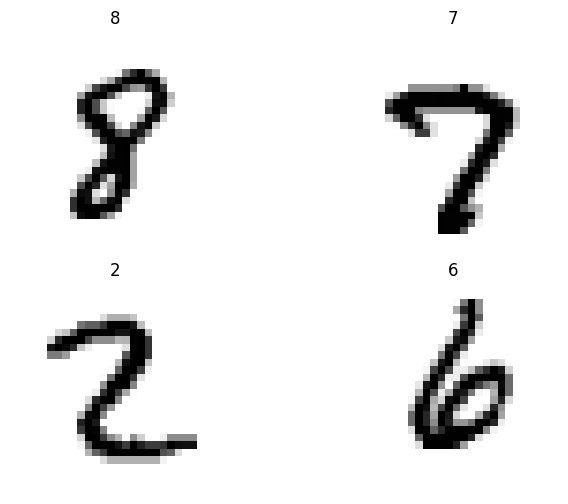

In [8]:
import random
fig = plt.figure(figsize=(8, 6))
for i in range(0, 4):
    ax = plt.subplot(2, 2, i+1)
    random_num = random.randint(0, 100)
    plt.imshow(X_train[random_num], cmap=plt.cm.binary)
    plt.title(y_train[random_num])
    plt.axis(False)

# Normalizing data!


If we don't normalizing data, model can't find patterns correctly, and the performance will be low and disappointing.

We are choosing the simplest way, just divide them to 255 (every picture pixel value differs from 0 to 255, so we just divide them to the max values and it is going in 0-1 range (same as MinMaxScaler))

In [27]:
X_train, X_test = X_train / 255, X_test / 255

***correctly in 0-1!***

In [10]:
X_train.max(), X_test.min()

(1.0, 0.0)

# Building our model

In [11]:
tf.random.set_seed(42)
# initial model
model = tf.keras.Sequential()
# creat a flatten layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# adding layers, first layer 8 units, second one 4 units and relu activation function
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
# output layer, with shape of 10(output shape) and softmax activation function
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model, with Adam optimizer, SparaseCategoricalCrossentrpy(because labels aren't in one-hot encoding)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# fit the model, with 20 epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4780 - loss: 1.4008 - val_accuracy: 0.8429 - val_loss: 0.5788
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8581 - loss: 0.5273 - val_accuracy: 0.8785 - val_loss: 0.4441
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8844 - loss: 0.4288 - val_accuracy: 0.8892 - val_loss: 0.4095
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8907 - loss: 0.3950 - val_accuracy: 0.8953 - val_loss: 0.3911
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8970 - loss: 0.3732 - val_accuracy: 0.8986 - val_loss: 0.3797
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9010 - loss: 0.3570 - val_accuracy: 0.8998 - val_loss: 0.3695
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9045 - loss: 0.3446 - val_accuracy: 0.9016 - val_loss: 0.3622
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9069 - loss: 0.3351

91% accuracy, really good model!

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │           6,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,100 (74.61 KB)

 Trainable params: 6,366 (24.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,734 (49.75 KB)

## Plot our model

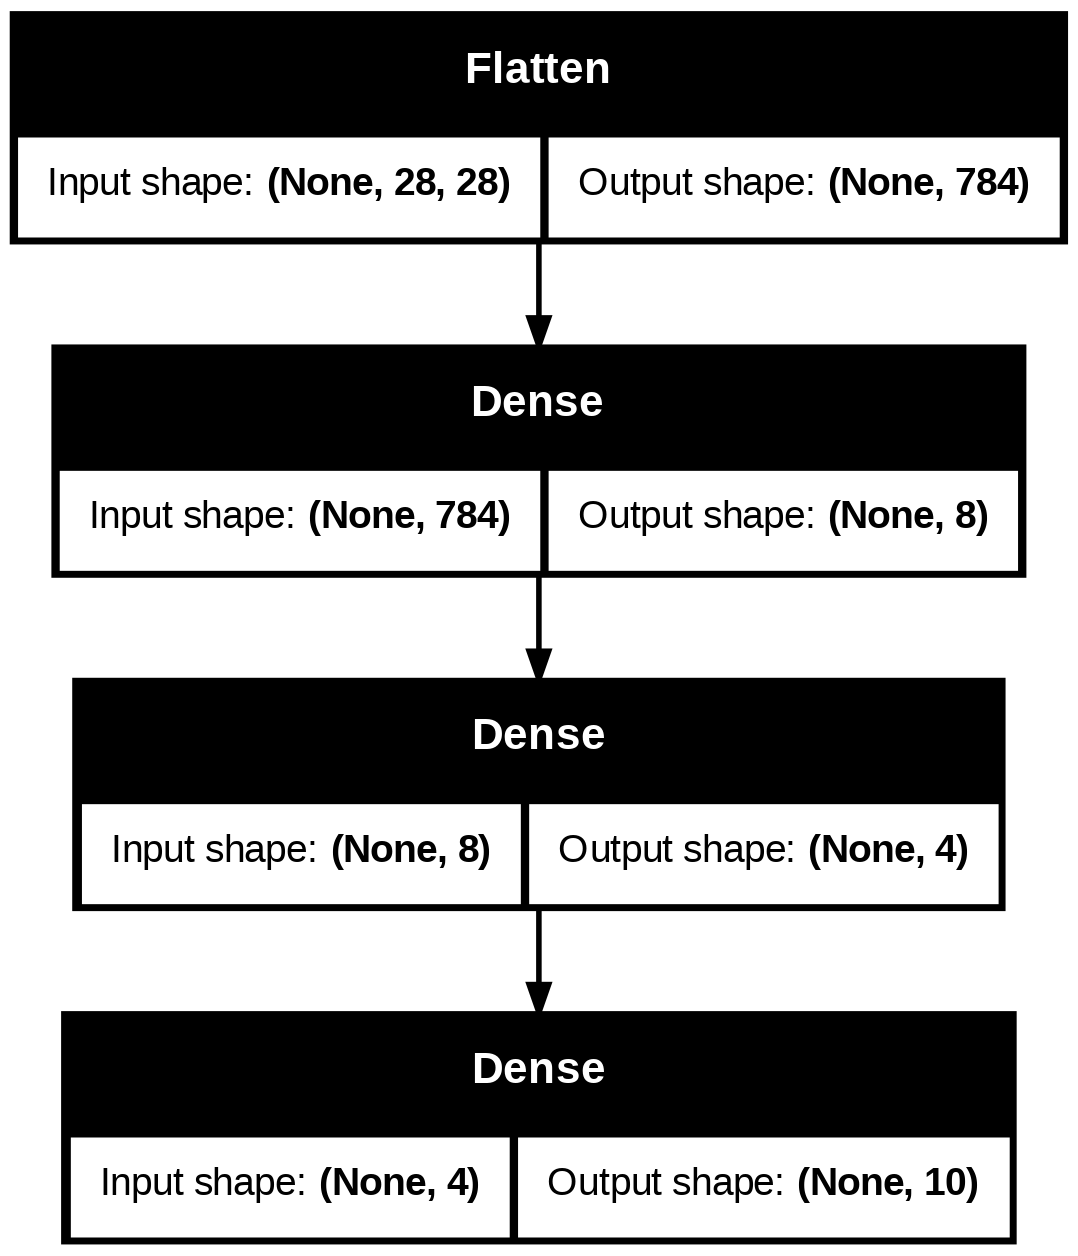

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Better understanding the training phase, plotting loss, accuracy

In [14]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe

,accuracy,loss,val_accuracy,val_loss
0,0.657183,1.003024,0.8429,0.578808
1,0.867117,0.492839,0.8785,0.444079
2,0.886150,0.420504,0.8892,0.409497
3,0.892383,0.390602,0.8953,0.391054
4,0.897883,0.370164,0.8986,0.379701
5,0.901333,0.354413,0.8998,0.369455
6,0.904933,0.342575,0.9016,0.362247
7,0.907683,0.333182,0.9031,0.356941
8,0.908600,0.326073,0.9036,0.353463
9,0.910250,0.320035,0.9033,0.350611


<Axes: >

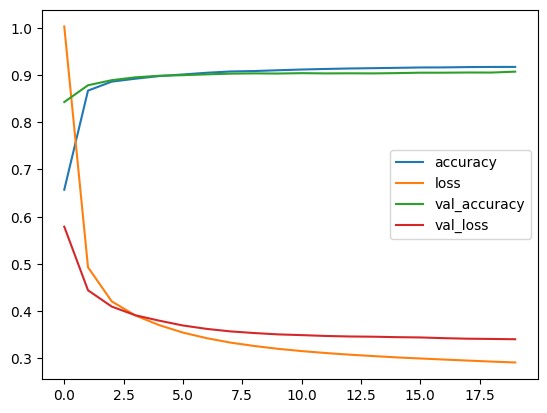

In [15]:
history_dataframe.plot()

Text(0, 0.5, 'test loss')

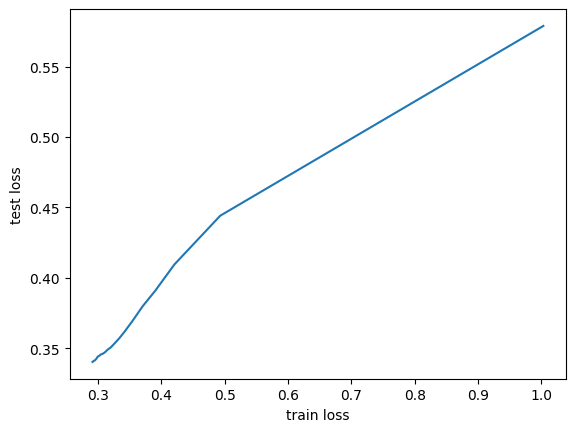

In [16]:
plt.plot(history.history['loss'], history.history['val_loss'])
plt.xlabel('train loss')
plt.ylabel('test loss')

# Evaluating phase

In [17]:
y_preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
y_preds.shape

(10000, 10)

In [19]:
y_preds[:3]

array([[2.0818536e-05, 6.1913539e-05, 1.9078961e-05, 2.1739128e-05,
        6.0891188e-11, 6.1808847e-10, 1.3020233e-12, 9.9980736e-01,
        9.8794571e-06, 5.9381022e-05],
       [1.7427504e-18, 1.4761444e-07, 9.9947035e-01, 1.0518538e-05,
        1.6514051e-13, 2.2009760e-11, 4.3339811e-11, 4.0659962e-19,
        5.1894796e-04, 1.6068914e-10],
       [2.6467496e-06, 9.9465102e-01, 3.0048350e-03, 4.6584148e-08,
        7.2691735e-04, 8.4191806e-11, 1.8437922e-05, 1.1583173e-03,
        4.2722916e-04, 1.0619509e-05]], dtype=float32)

y_pred does not return a single label; instead, it returns the probability for each of the 10 classes. We need the highest probability.

To solve this we simply run tf.argmax(y_pred) to get the label with the highest probability.

In [20]:
y_preds_labels = [tf.argmax(y_preds[i]) for i in range(len(y_preds))]

In [21]:
y_preds_labels[:5]

[<tf.Tensor: shape=(), dtype=int64, numpy=7>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>]

## Evaluating The Model

### confusion_matrix code

In [22]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


# Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds_labels)

array([[ 927,    0,    0,    0,    1,    6,   14,    8,   24,    0],
       [   0, 1110,    7,    3,    1,    1,    3,    3,    7,    0],
       [   4,    8,  893,   14,    8,    1,    7,   15,   67,   15],
       [   2,    0,   30,  902,    1,   38,    0,    5,   18,   14],
       [   1,    2,    5,    0,  915,    0,    6,    4,    9,   40],
       [  27,    1,    2,   43,    6,  751,   12,    2,   36,   12],
       [  16,    4,    1,    0,   24,    5,  894,    0,   14,    0],
       [   1,    8,   26,    2,    7,    0,    0,  945,    5,   34],
       [   5,    4,   52,   11,    8,   22,   30,   15,  822,    5],
       [   0,    5,    2,   22,   23,    6,    0,   32,    5,  914]])

### classification report contains:
* precision
* recall
* f1-score
* accuracy

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_labels))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       980
           1       0.97      0.98      0.97      1135
           2       0.88      0.87      0.87      1032
           3       0.90      0.89      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.84      0.87       892
           6       0.93      0.93      0.93       958
           7       0.92      0.92      0.92      1028
           8       0.82      0.84      0.83       974
           9       0.88      0.91      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



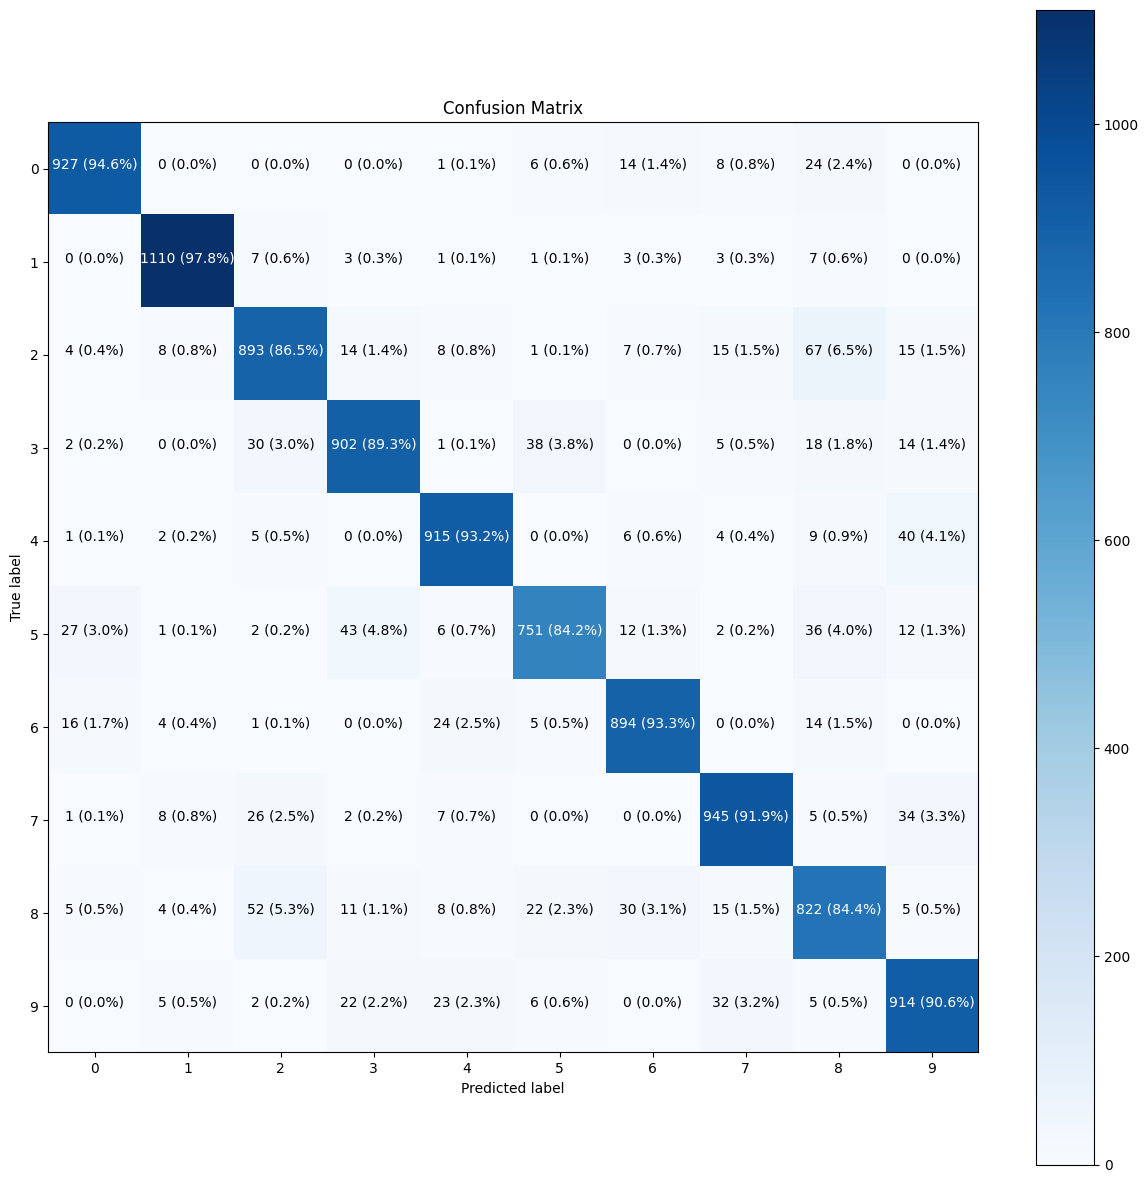

In [25]:
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds_labels,
                      figsize=(15, 15),
                      text_size=10)

# Showing some images with labels and prediction
if prediction is correct, it shows it in green, and if it's wrong, it shows it in red

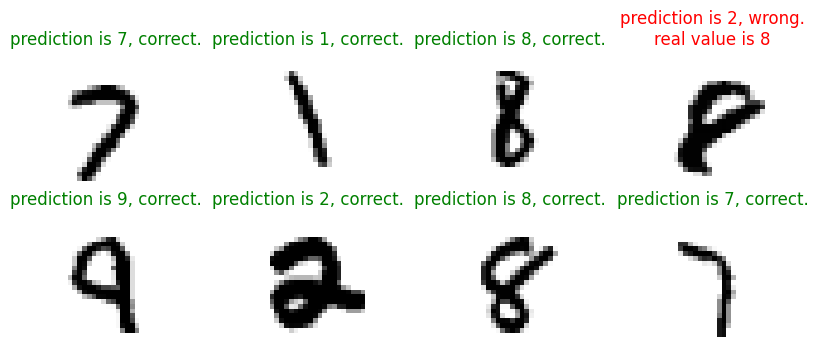

In [26]:
plt.figure(figsize=(10, 8))
for i in range(0, 8):
    plt.subplot(4, 4, i+1)
    random_2 = random.randint(0, 400)
    plt.imshow(X_test[random_2], cmap=plt.cm.binary)
    plt.axis(False)
    if (y_preds_labels[random_2] == y_test[random_2]):
        plt.title('prediction is {}, correct.'.format(y_preds_labels[random_2]), color='green')
    else:
        plt.title('prediction is {}, wrong.\nreal value is {}'.format(y_preds_labels[random_2], y_test[random_2]), color='red')

1 Wrong and 7 correct, really good performance!